In [646]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [647]:
# from google.colab import drive
# drive.mount('/content/drive')

In [648]:
# df = pd.read_csv("/content/drive/MyDrive/DataScience/predicciones-de-ventas-alimenticias/sales_predictions.csv")
df = pd.read_csv("sales_predictions.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [649]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [650]:
df.dropna(inplace=True)

In [651]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [652]:
df.loc[df["Item_Fat_Content"] == "LF", "Item_Fat_Content"] = "Low Fat"
df.loc[df["Item_Fat_Content"] == "low fat", "Item_Fat_Content"] = "Low Fat"
df.loc[df["Item_Fat_Content"] == "reg", "Item_Fat_Content"] = "Regular"

In [653]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB


In [654]:
df["Item_Type"].value_counts()

Fruits and Vegetables    670
Snack Foods              656
Household                498
Frozen Foods             477
Dairy                    380
Canned                   361
Baking Goods             351
Health and Hygiene       277
Soft Drinks              241
Meat                     221
Breads                   132
Hard Drinks              117
Others                    91
Starchy Foods             87
Breakfast                 58
Seafood                   33
Name: Item_Type, dtype: int64

In [655]:
#X = df.drop(columns = ['Item_Outlet_Sales', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])
X = df.drop(columns = ['Item_Outlet_Sales', 'Item_Identifier'])
y = df['Item_Outlet_Sales']

In [656]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
5,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2
...,...,...,...,...,...,...,...,...,...,...
8517,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [657]:
y

0       3735.1380
1        443.4228
2       2097.2700
4        994.7052
5        556.6088
          ...    
8517    3608.6360
8518    2778.3834
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 4650, dtype: float64

In [658]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

X_cat = X[cat_selector]
X_num = X[num_selector].reset_index(drop=True)


ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_encoder.fit(X_cat)
ohe_column_names = ohe_encoder.get_feature_names_out(X_cat.columns)

X_ohe = ohe_encoder.transform(X_cat)
X_ohe = pd.DataFrame(X_ohe, columns=ohe_column_names)

X_processed = pd.concat([X_ohe, X_num], axis=1)

X_processed

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,9.300,0.016047,249.8092,1999
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,5.920,0.019278,48.2692,2009
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,17.500,0.016760,141.6180,1999
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,8.930,0.000000,53.8614,1987
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,10.395,0.000000,51.4008,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4645,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,20.750,0.083607,178.8318,1997
4646,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,6.865,0.056783,214.5218,1987
4647,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,10.600,0.035186,85.1224,2004
4648,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,7.210,0.145221,103.1332,2009


In [659]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, random_state=42, test_size=0.20)

In [660]:
#X_train["Item_Identifier"].value_counts()

In [661]:
#X_test["Item_Identifier"].value_counts()

In [662]:
# common_val = np.intersect1d(X_train["Item_Identifier"].unique(), X_test["Item_Identifier"].unique())
# len(common_val)

In [663]:
# cat_selector = make_column_selector(dtype_include='object')
# num_selector = make_column_selector(dtype_include='number')

In [664]:
# # One-hot encoder
# ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# # Scaler
# scaler = StandardScaler()

In [665]:
# # Numeric pipeline
# numeric_pipe = make_pipeline(scaler)

# # Categorical pipeline
# categorical_pipe = make_pipeline(ohe)

In [666]:
# # Tuples para Column Transformer
# number_tuple = (numeric_pipe, num_selector)
# category_tuple = (categorical_pipe, cat_selector)

# # ColumnTransformer
# #preprocessor = make_column_transformer(category_tuple, number_tuple, remainder='passthrough')
# preprocessor = make_column_transformer(number_tuple, remainder='passthrough')

In [667]:
# preprocessor.fit(X_train)

In [668]:
# # transform train and test
# X_train_processed = preprocessor.transform(X_train)
# X_test_processed = preprocessor.transform(X_test)

In [669]:
# y_train = y_train.reset_index()['Item_Outlet_Sales']
# y_test = y_test.reset_index()['Item_Outlet_Sales']

In [670]:
X_train

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
3260,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,15.30,0.000000,103.5332,2004
452,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,7.42,0.020475,248.4092,2009
3705,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,7.27,0.071064,114.4518,2004
2655,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,10.30,0.058919,191.6530,1999
4603,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,12.65,0.062878,160.9578,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,12.60,0.024293,33.4874,2009
466,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,19.85,0.020961,62.0194,2009
3092,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,14.35,0.080922,80.0960,2009
3772,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,14.00,0.030141,216.0192,1999


In [671]:
X_test

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1705,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,8.260,0.034458,113.3834,1999
354,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,20.000,0.104245,105.3622,1999
33,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,9.895,0.028697,117.0492,1987
2592,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,8.115,0.032159,154.8972,1997
505,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,10.895,0.064622,196.6794,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,18.750,0.034361,215.7218,1999
445,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,11.800,0.113235,186.3924,1987
1924,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,9.195,0.122803,100.1016,2009
2321,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,9.600,0.029619,43.6086,1987


In [ ]:
# y_train = y_train.reset_index()['Item_Outlet_Sales']
# y_test = y_test.reset_index()['Item_Outlet_Sales']

In [672]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [673]:
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print("Score de Entrenamiento:\t", round(train_score, 4))
print("Score de Prueba:\t", round(test_score, 4))

Score de Entrenamiento:	 0.4664
Score de Prueba:	 0.4965


In [674]:
# Obtengan las predicciones del conjunto de entrenamiento
train_preds = reg.predict(X_train)

# Obtengan las predicciones del conjunto de prueba
test_preds = reg.predict(X_test)

In [675]:
train_compare_df = pd.DataFrame(y_train)
train_compare_df["prediction"] = train_preds
train_compare_df

,Item_Outlet_Sales,prediction
5953,3383.5956,1791.822121
845,996.0368,3761.974031
6759,1366.2216,1902.220654
4856,5313.0840,3182.251326
8434,4332.3606,2656.968123
...,...,...
8103,105.8622,185.140063
874,619.1940,705.718347
5660,1278.3360,1067.988954
6878,2588.6304,3589.188001


In [676]:
test_compare_df = pd.DataFrame(y_test)
test_compare_df["prediction"] = test_preds
test_compare_df

,Item_Outlet_Sales,prediction
3127,2073.3012,1946.276753
668,1270.3464,1768.269962
52,810.9444,1891.981445
4735,1713.7692,2459.559173
941,1170.4764,3193.188088
...,...,...
2463,4274.4360,3573.275954
829,5367.6796,2946.232397
3514,1113.2176,1302.447035
4239,624.5204,695.230182


In [677]:
#train_compare_df.sort_values(by=["Item_Outlet_Sales"]).reset_index().drop(columns="index")

In [678]:
item_sales = train_compare_df.sort_values(by = ['Item_Outlet_Sales']).reset_index()["Item_Outlet_Sales"]
predicted = train_compare_df.sort_values(by = ['Item_Outlet_Sales']).reset_index()["prediction"]

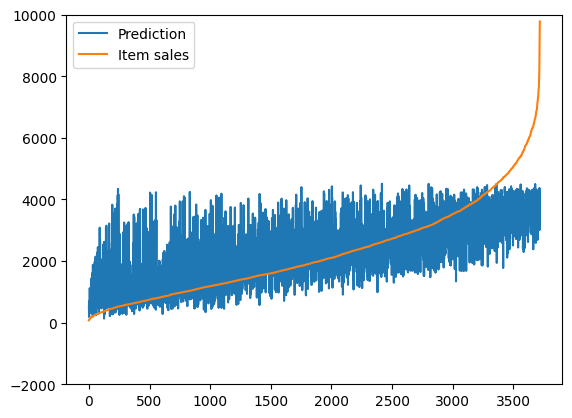

In [679]:
import matplotlib.pyplot as plt
plt.plot(predicted, label = 'Prediction')
plt.plot(item_sales, label = 'Item sales')
plt.ylim(-2000, 10000)
plt.legend();

In [680]:
item_sales = test_compare_df.sort_values(by = ['Item_Outlet_Sales']).reset_index()["Item_Outlet_Sales"]
predicted = test_compare_df.sort_values(by = ['Item_Outlet_Sales']).reset_index()["prediction"]

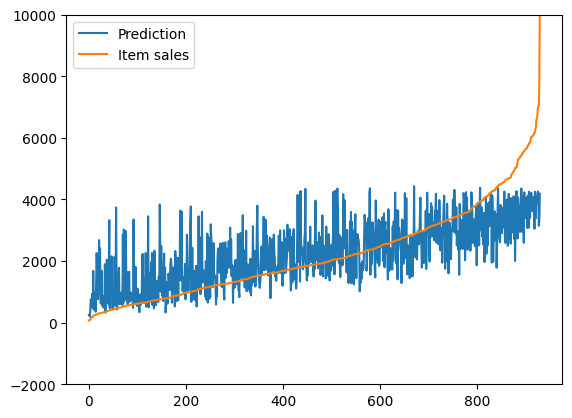

In [681]:
plt.plot(predicted, label = 'Prediction')
plt.plot(item_sales, label = 'Item sales')
plt.ylim(-2000, 10000)
plt.legend();